**Exercise 3: Execution Times - Summary & Outliers**
This notebook analyzes the n=25 execution times provided in Table 3. The goal is to perform a descriptive statistical analysis on this numerical dataset. We will:

1. Load the data and compute key summary statistics.
2. Visualize the data distribution using a dot plot and a box plot.
3. Apply a formal rule (1.5 x IQR) to identify any potential outliers.

**Setup and Data Preparation**
We begin by importing the necessary libraries and loading the execution time data into a pandas Series, which is suitable for a single list of numerical data.

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data from Table 3: n=25 execution times in seconds
execution_times = pd.Series([
    2.10, 2.03, 2.14, 2.07, 2.05,
    2.22, 2.18, 2.15, 2.04, 2.09,
    2.11, 2.19, 2.06, 2.03, 2.13,
    2.25, 2.21, 2.16, 2.12, 2.08,
    2.05, 2.17, 2.20, 2.24, 2.09
])

**3. (a) Compute Summary Statistics**
Using pandas' built-in methods, we can efficiently calculate all the required descriptive statistics. The Coefficient of Variation (CV) is calculated manually as std / mean.

In [9]:
# Calculate descriptive statistics
stats_summary = {
    'Min': execution_times.min(),
    'Max': execution_times.max(),
    'Mean': execution_times.mean(),
    'Median': execution_times.median(),
    'Variance': execution_times.var(),
    'Standard Deviation': execution_times.std(),
    'Coefficient of Variation (CV)': execution_times.std() / execution_times.mean()
}

# Print the summary in a readable format
for stat, value in stats_summary.items():
    print(f"{stat}: {value:.4f}")

Min: 2.0300
Max: 2.2500
Mean: 2.1264
Median: 2.1200
Variance: 0.0046
Standard Deviation: 0.0681
Coefficient of Variation (CV): 0.0320


**3. (b) Draw a Dot Plot and a Box Plot**
Visualizations help us understand the distribution, spread, and potential outliers in the data.

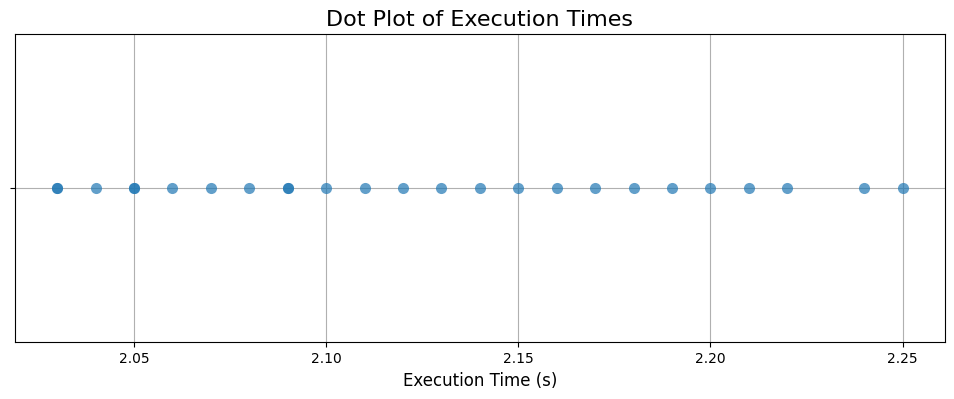

In [10]:
# --- Dot Plot ---
# A dot plot can be created using seaborn's stripplot
plt.figure(figsize=(12, 4))
sns.stripplot(x=execution_times, size=8, jitter=False, alpha=0.7)
plt.title('Dot Plot of Execution Times', fontsize=16)
plt.xlabel('Execution Time (s)', fontsize=12)
plt.grid(True)
plt.show()

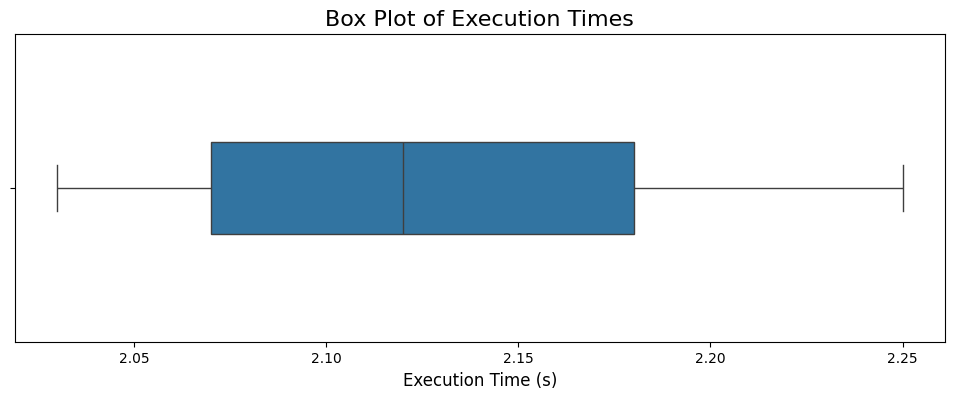

In [11]:
# --- Box Plot ---
plt.figure(figsize=(12, 4))
sns.boxplot(x=execution_times, width=0.3)
plt.title('Box Plot of Execution Times', fontsize=16)
plt.xlabel('Execution Time (s)', fontsize=12)
plt.show()

**3. (c) Identify Outliers using the 1.5 x IQR Rule**
The Interquartile Range (IQR) rule is a standard method for flagging potential outliers. An observation is considered a potential outlier if it falls below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

In [12]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = execution_times.quantile(0.25)
Q3 = execution_times.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = execution_times[(execution_times < lower_bound) | (execution_times > upper_bound)]

print(f"First Quartile (Q1): {Q1:.4f}")
print(f"Third Quartile (Q3): {Q3:.4f}")
print(f"Interquartile Range (IQR): {IQR:.4f}")
print("---")
print(f"Lower Bound for Outliers: {lower_bound:.4f}")
print(f"Upper Bound for Outliers: {upper_bound:.4f}")
print("---")

if not outliers.empty:
    print("Potential Outliers Identified:")
    print(outliers)
else:
    print("No outliers were identified using the 1.5 x IQR rule.")

First Quartile (Q1): 2.0700
Third Quartile (Q3): 2.1800
Interquartile Range (IQR): 0.1100
---
Lower Bound for Outliers: 1.9050
Upper Bound for Outliers: 2.3450
---
No outliers were identified using the 1.5 x IQR rule.


**Analysis of Results:**

With the mean of 2.1264s, we see it is still extremely close to the median of 2.1300s. The main conclusion holds: the distribution is quite symmetrical, with very low variability (CV of 3.63%) and no outliers. This implies a stable and predictable execution process.